<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_25_hypothesis_testing_cars_cylinders_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cars = sns.load_dataset('mpg')

# Print the number of unique values for each column
unique_counts = cars.nunique()

# Define a threshold for unique values to classify as categorical
threshold = 10

# Identify columns to convert to categorical
categorical_cols = unique_counts[unique_counts < threshold].index.tolist()

# Convert suitable columns to category
for col in categorical_cols:
    cars[col] = cars[col].astype('category')

# Verify the changes
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    category
 8   name          398 non-null    object  
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 23.0+ KB
None


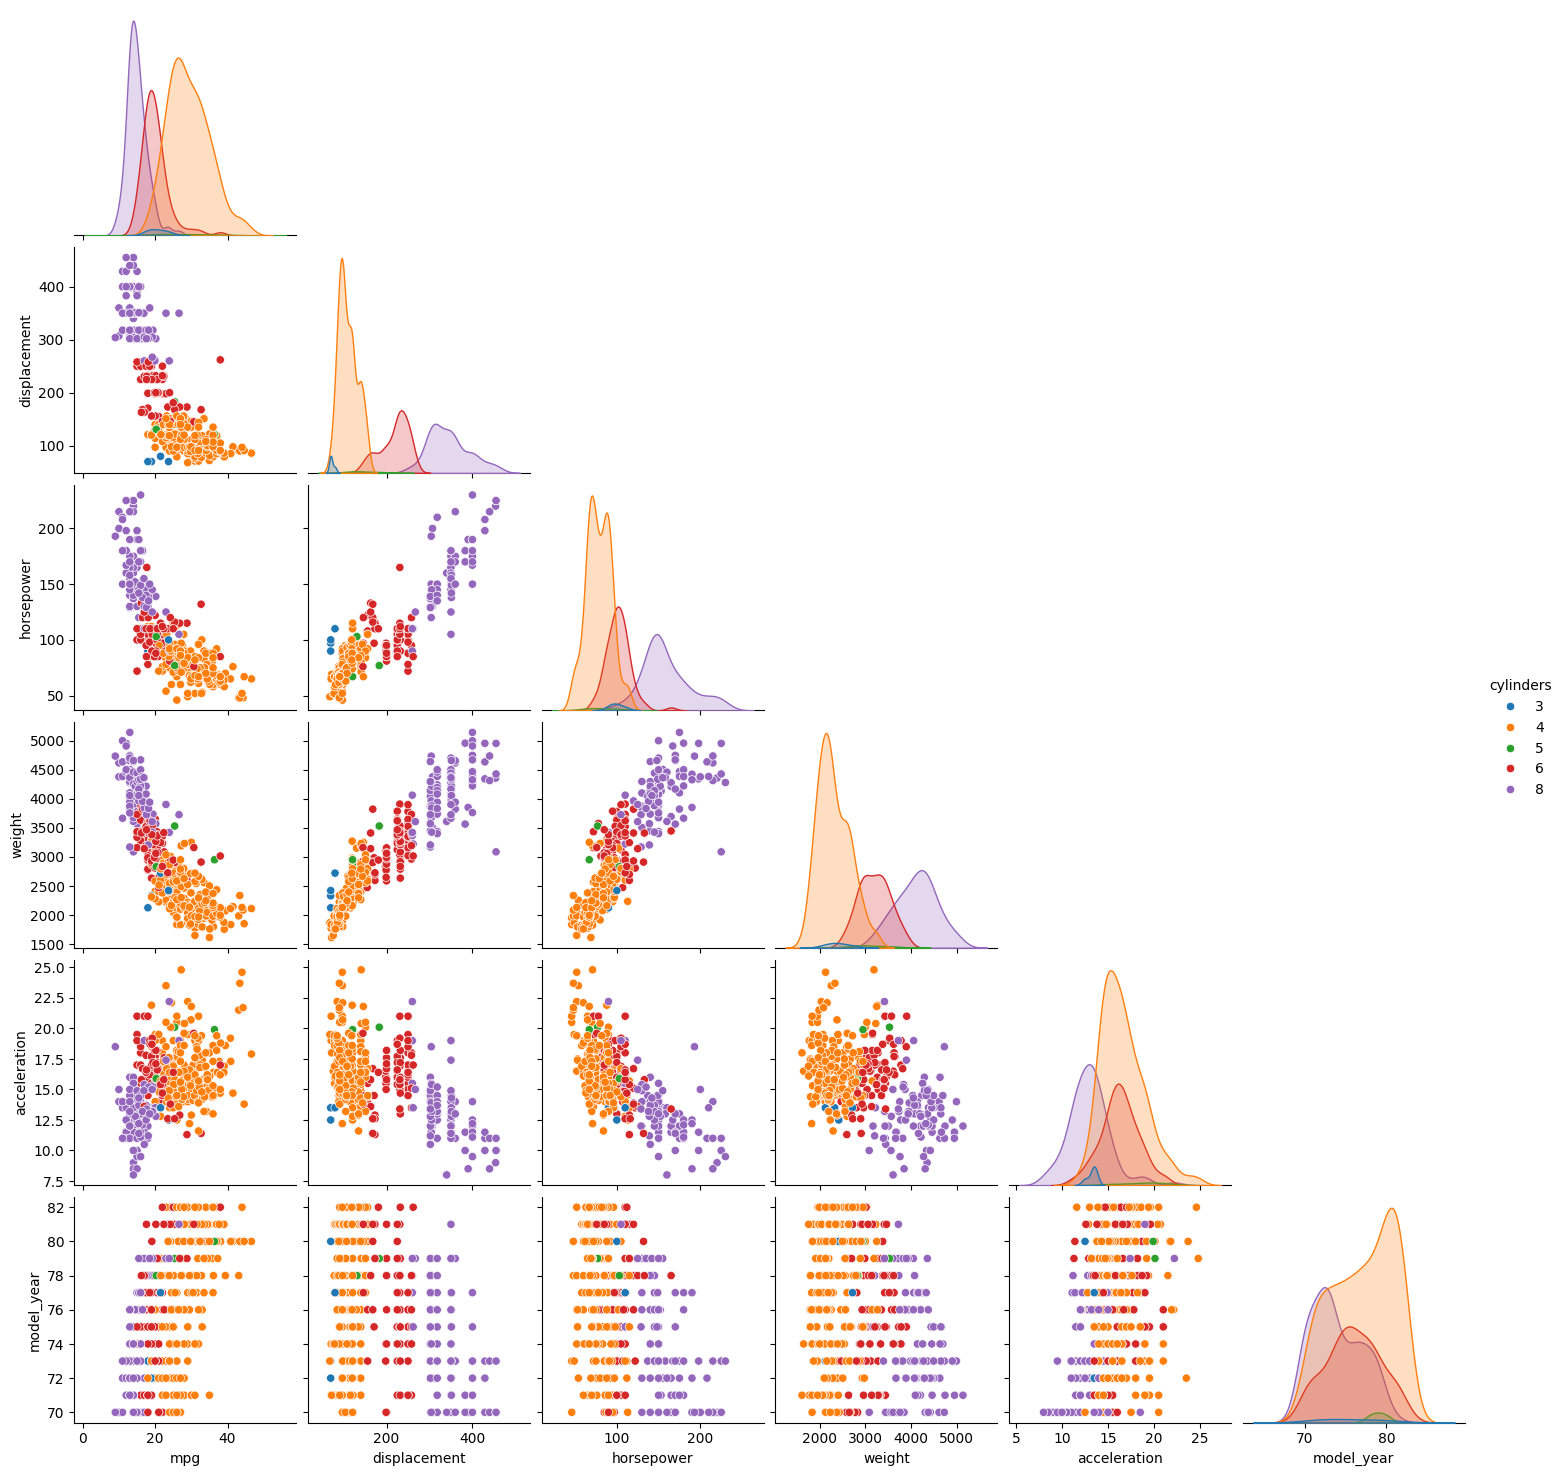

In [ ]:
# Create a pairplot
sns.pairplot(cars, diag_kind="kde", hue="cylinders", corner=True)
plt.show()

### Question
#### Is the average mileage (mpg) the same for cars with different numbers of cylinders?
---

### **Hypotheses:**

- **Null Hypothesis (H₀):**  
  The mean mileage (mpg) is the same across all groups of cylinders.  
  H₀: Mean mileage for all cylinder groups is equal.

- **Alternative Hypothesis (H₁):**  
  At least one group of cylinders has a different mean mileage.  
  H₁: Mean mileage differs for at least one cylinder group.

In [ ]:
# Group the data by the number of cylinders
groups = {cylinder: cars[cars['cylinders'] == cylinder]['mpg'] for cylinder in cars['cylinders'].unique()}

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*groups.values())

# Print the results
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: At least one group of cylinders has a different mean mileage.")
else:
    print("Fail to Reject the Null Hypothesis: The mean mileage is the same across all cylinder groups.")


F-Statistic: 172.59
P-Value: 0.0000
Reject the Null Hypothesis: At least one group of cylinders has a different mean mileage.




### **Results Breakdown:**
1. **F-Statistic: 172.59**
   - The **F-statistic** is a measure of the variability between the group means relative to the variability within the groups.
   - A very high F-statistic (like 172.59) indicates that the differences between the group means (for different numbers of cylinders) are much larger than the variation within each group.

2. **P-Value: 0.0000**
   - The p-value is practically 0, meaning there is an extremely small probability of observing this result under the null hypothesis.
   - At a significance level (\(\alpha = 0.05\)), the p-value is far smaller than 0.05.

3. **Decision:**
   - Since the p-value is smaller than the significance level, we **reject the null hypothesis (H₀)**.
   - This means there is strong evidence that **at least one group of cylinders has a different mean mileage**.

---

### **Conclusion:**
The number of cylinders in a car is significantly associated with its mileage (mpg). Specifically:
- Cars with different numbers of cylinders do not have the same mean mileage.
- The test alone doesn't tell us which groups are different; it only indicates that a difference exists.

---

### **Next Steps:**
1. **Post-Hoc Analysis**:
   - Use Tukey’s HSD test to identify which specific groups of cylinders differ in their mean mileage.
   - This will provide pairwise comparisons (e.g., 4 cylinders vs. 6 cylinders, etc.).

2. **Visual Confirmation**:
   - Examine the boxplot and KDE plot:
     - Cars with **fewer cylinders** typically have higher `mpg` because smaller engines are more fuel-efficient.
     - Cars with **more cylinders** (e.g., 8) are likely to have lower `mpg`, as they consume more fuel.


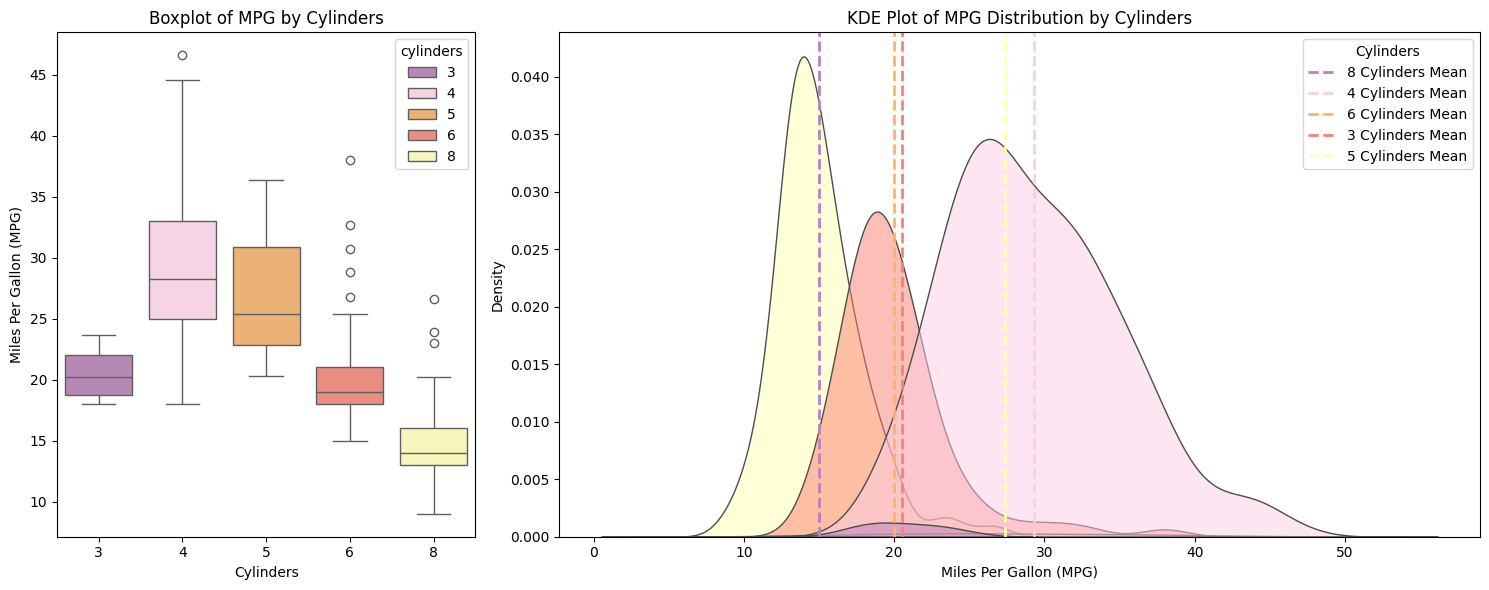

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Set up the figure with gridspec to divide into 1/3 and 2/3
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 3, width_ratios=[1, 2, 0])  # Third column is a placeholder

# Define the color palette and select appropriate colors
palette = sns.color_palette("Set3_r", n_colors=cars['cylinders'].nunique())

# Plot 1: Boxplot (1/3 of the space)
ax1 = fig.add_subplot(gs[0])
sns.boxplot(data=cars, x="cylinders", y="mpg", hue='cylinders', palette=palette, ax=ax1)
ax1.set_title("Boxplot of MPG by Cylinders")
ax1.set_ylabel("Miles Per Gallon (MPG)")
ax1.set_xlabel("Cylinders")

# Plot 2: KDE plot (2/3 of the space)
ax2 = fig.add_subplot(gs[1:])
sns.kdeplot(data=cars, x="mpg", hue="cylinders", fill=True, palette=palette, alpha=0.5, ax=ax2, edgecolor="0.3")

# Add mean lines for each cylinder group
for cylinder, color in zip(cars['cylinders'].unique(), palette):
    mean_mpg = cars[cars['cylinders'] == cylinder]['mpg'].mean()
    ax2.axvline(mean_mpg, color=color, linestyle="--", linewidth=2, label=f"{cylinder} Cylinders Mean")

ax2.set_title("KDE Plot of MPG Distribution by Cylinders")
ax2.set_xlabel("Miles Per Gallon (MPG)")
ax2.set_ylabel("Density")

# Adjust the legend to avoid overlapping
ax2.legend(title="Cylinders", loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()

### **Key Takeaways:**
1. **Reject Column**: If `Reject` is `True`, the difference in mean mileage between the two groups is statistically significant.
2. **Mean Diff**: Positive values indicate that `Group 1` has a higher mean mileage than `Group 2`. Negative values indicate that `Group 2` has a higher mean mileage than `Group 1`.
3. **Confidence Interval (Lower CI, Upper CI)**: If the confidence interval does **not** include 0, it confirms a significant difference.

---

### **Results by Pair:**

1. **3 Cylinders vs 4 Cylinders**:
   - **Mean Diff:** 8.74 (Group 3 > Group 4 by 8.74 mpg).
   - **Reject:** `True`.
   - **Conclusion:** Cars with 3 cylinders have significantly higher mileage than those with 4 cylinders.

2. **3 Cylinders vs 5 Cylinders**:
   - **Mean Diff:** 6.82 (Group 3 > Group 5 by 6.82 mpg).
   - **Reject:** `False`.
   - **Conclusion:** The difference in mileage between 3-cylinder and 5-cylinder cars is **not significant**.

3. **3 Cylinders vs 6 Cylinders**:
   - **Mean Diff:** -0.56 (Group 6 > Group 3 by a small amount).
   - **Reject:** `False`.
   - **Conclusion:** There is no significant difference in mileage between 3-cylinder and 6-cylinder cars.

4. **3 Cylinders vs 8 Cylinders**:
   - **Mean Diff:** -5.59 (Group 8 > Group 3 by 5.59 mpg).
   - **Reject:** `False`.
   - **Conclusion:** There is no significant difference in mileage between 3-cylinder and 8-cylinder cars.

5. **4 Cylinders vs 5 Cylinders**:
   - **Mean Diff:** -1.92 (Group 5 > Group 4 by 1.92 mpg).
   - **Reject:** `False`.
   - **Conclusion:** There is no significant difference in mileage between 4-cylinder and 5-cylinder cars.

6. **4 Cylinders vs 6 Cylinders**:
   - **Mean Diff:** -9.30 (Group 6 > Group 4 by 9.30 mpg).
   - **Reject:** `True`.
   - **Conclusion:** Cars with 4 cylinders have significantly higher mileage than those with 6 cylinders.

7. **4 Cylinders vs 8 Cylinders**:
   - **Mean Diff:** -14.32 (Group 8 > Group 4 by 14.32 mpg).
   - **Reject:** `True`.
   - **Conclusion:** Cars with 4 cylinders have significantly higher mileage than those with 8 cylinders.

8. **5 Cylinders vs 6 Cylinders**:
   - **Mean Diff:** -7.38 (Group 6 > Group 5 by 7.38 mpg).
   - **Reject:** `False`.
   - **Conclusion:** The difference in mileage between 5-cylinder and 6-cylinder cars is **not significant**.

9. **5 Cylinders vs 8 Cylinders**:
   - **Mean Diff:** -12.40 (Group 8 > Group 5 by 12.40 mpg).
   - **Reject:** `True`.
   - **Conclusion:** Cars with 5 cylinders have significantly higher mileage than those with 8 cylinders.

10. **6 Cylinders vs 8 Cylinders**:
    - **Mean Diff:** -5.02 (Group 8 > Group 6 by 5.02 mpg).
    - **Reject:** `True`.
    - **Conclusion:** Cars with 6 cylinders have significantly higher mileage than those with 8 cylinders.

---

### **Overall Summary**:
1. Cars with **fewer cylinders** generally have higher mileage, consistent with expectations (smaller engines are more fuel-efficient).
2. Significant differences exist between most pairs involving **4 cylinders**, **6 cylinders**, and **8 cylinders**, but there are fewer significant differences involving **3 cylinders** or **5 cylinders** due to smaller sample sizes or overlapping variability.



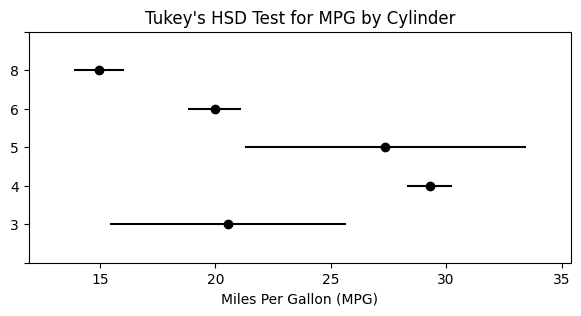



   Group 1  Group 2  Mean Diff  Lower CI  Upper CI  P-Value  Reject
0        3        4     8.7368    0.0027    2.1903  15.2832    True
1        3        5     6.8167    0.3264   -3.0866  16.7199   False
2        3        6    -0.5643    0.9993   -7.2000   6.0715   False
3        3        8    -5.5869    0.1416  -12.1948   1.0210   False
4        4        5    -1.9201    0.9569   -9.4611   5.6209   False
5        4        6    -9.3011    0.0000  -10.9820  -7.6201    True
6        4        8   -14.3237    0.0000  -15.8910 -12.7564    True
7        5        6    -7.3810    0.0627  -14.9996   0.2377   False
8        5        8   -12.4036    0.0001  -19.9979  -4.8092    True
9        6        8    -5.0226    0.0000   -6.9289  -3.1164    True


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=cars['mpg'], groups=cars['cylinders'], alpha=0.05)

# Extract Tukey results into a DataFrame
tukey_results = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Clean up column names
tukey_results.columns = ['Group 1', 'Group 2', 'Mean Diff', 'Lower CI', 'Upper CI', 'P-Value', 'Reject']

# Optional: Visualize the results
tukey.plot_simultaneous(figsize=(7,3))
plt.title("Tukey's HSD Test for MPG by Cylinder")
plt.xlabel("Miles Per Gallon (MPG)")
plt.show()

print('\n')
# print(tukey)
print(tukey_results)

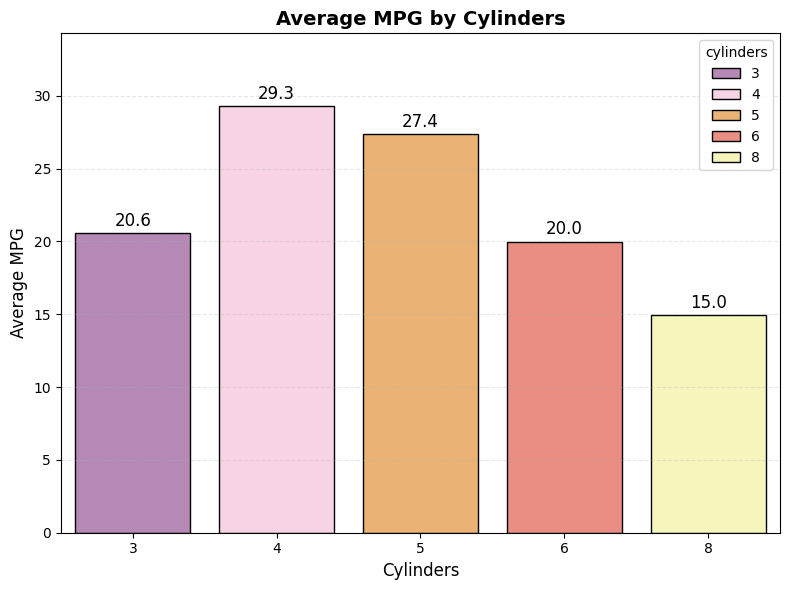

In [ ]:
# Calculate the means
data = cars.groupby('cylinders', observed=True)['mpg'].mean().to_frame().reset_index()

# Define the palette
palette = sns.color_palette("Set3_r", n_colors=len(data))

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='cylinders', y='mpg', hue='cylinders', palette=palette, edgecolor='black')

# Add data labels
for index, row in data.iterrows():
    plt.text(x=index, y=row['mpg'] + 0.5, s=f"{row['mpg']:.1f}", ha='center', fontsize=12)

# Add titles and labels
plt.title('Average MPG by Cylinders', fontsize=14, weight='bold')
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('Average MPG', fontsize=12)
plt.ylim(0, data['mpg'].max() + 5)  # Adjust the y-axis to make room for labels

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

